ФИО:

In [ ]:
Есмуханов Арман Еркинович

## Задание 1. HTTP-запросы, ответы и погода

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API. Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


latitude, longitude = map(float, input().split(', '))
url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true"
response = requests.get(url).json()

temp = response['current_weather']['temperature']

weather_code = response['current_weather']['weathercode']


weather_description = "нет осадков"
if weather_code == 1:
    weather_description = "туман"


today = datetime.now().strftime("%d.%m")
print(f"Сегодня ({today}) погода {temp} ◦С, {weather_description}.")

56.50, 60.35
Сегодня (29.10) погода -0.6 ◦С, нет осадков.


## Задание 2. HTTP-запросы, ответы и покемоны


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests
url='https://pokeapi.co/api/v2/pokemon/'
def list_first_20():
  names=[]
  for i in range(1, 21):
    names.append(requests.get(url=f'https://pokeapi.co/api/v2/pokemon/{i}').json()['name'])

def show_chars():
  pokemon_name=input('Имя покемона: ')
  pk_data=[]
  response=requests.get(url+pokemon_name).json()
  print(f"имя - {response['name']}")
  print(f"тип - {response['types'][0]['type']['name']}")
  print(f"вес - {response['weight']}")
  print(f"рост - {response['height']}")
  print(f"способности - {response['abilities'][0]['ability']['name']}")




show_chars()


Имя покемона: clefairy
имя - clefairy
тип - fairy
вес - 75
рост - 6
способности - cute-charm


## Задание 3. HTTP-запросы, ответы и посты

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


url='https://jsonplaceholder.typicode.com/posts'

def show_posts_json():
  return requests.get(url).json()


def get_post(post_id):
  return requests.get(url).json()[post_id-1]


def show_important_info(post_id):
  return [requests.get(url).json()[post_id-1]['id'], requests.get(url).json()[post_id-1]['title'], (requests.get(url).json()[post_id-1]['body'])]

print(show_posts_json())
print(get_post(2))
print(show_important_info(2))

[{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident rerum culpa\nquis hic c

## Задание 4. HTTP-запросы, ответы и работа с постами

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


url='https://jsonplaceholder.typicode.com/posts/'




def create_post():
  post={
  'post_header': input("Заголовок: "),
  'post_body':input('Содержимое поста: '),
  'post_id':int(input('ID пользователя: '))
  }

  requests.post(url, json=post)


def update_post():
  updated_post={
  'post_header': input("Заголовок: "),
  'post_body':input('Содержимое поста: '),
  'post_id':int(input('ID пользователя: '))
  }

  requests.post(url+str(updated_post['post_id']), json=updated_post)


def delete_post():
  post_id=input('ID пользователя: ')
  response = requests.delete(url+post_id)
  return response.status_code


create_post()
update_post()
delete_post()

Заголовок: s
Содержимое поста: s
ID пользователя: 2
Заголовок: sd
Содержимое поста: dewf
ID пользователя: 23
ID пользователя: 1


200

## Задание 5. HTTP-запросы, ответы и пёсики

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


['affenpinscher', 'african', 'airedale', 'akita', 'appenzeller', 'australian', 'bakharwal', 'basenji', 'beagle', 'bluetick', 'borzoi', 'bouvier', 'boxer', 'brabancon', 'briard', 'buhund', 'bulldog', 'bullterrier', 'cattledog', 'cavapoo', 'chihuahua', 'chippiparai', 'chow', 'clumber', 'cockapoo', 'collie', 'coonhound', 'corgi', 'cotondetulear', 'dachshund', 'dalmatian', 'dane', 'danish', 'deerhound', 'dhole', 'dingo', 'doberman', 'elkhound', 'entlebucher', 'eskimo', 'finnish', 'frise', 'gaddi', 'germanshepherd', 'greyhound', 'groenendael', 'havanese', 'hound', 'husky', 'keeshond', 'kelpie', 'kombai', 'komondor', 'kuvasz', 'labradoodle', 'labrador', 'leonberg', 'lhasa', 'malamute', 'malinois', 'maltese', 'mastiff', 'mexicanhairless', 'mix', 'mountain', 'mudhol', 'newfoundland', 'otterhound', 'ovcharka', 'papillon', 'pariah', 'pekinese', 'pembroke', 'pinscher', 'pitbull', 'pointer', 'pomeranian', 'poodle', 'pug', 'puggle', 'pyrenees', 'rajapalayam', 'redbone', 'retriever', 'ridgeback', 'r

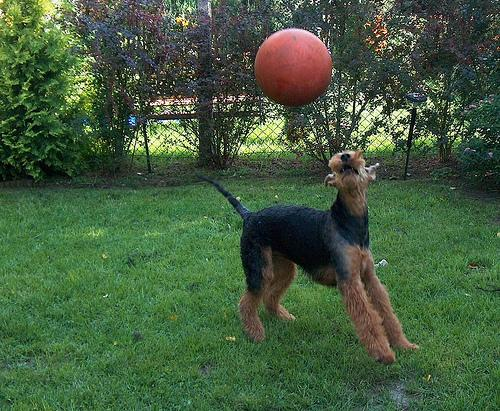

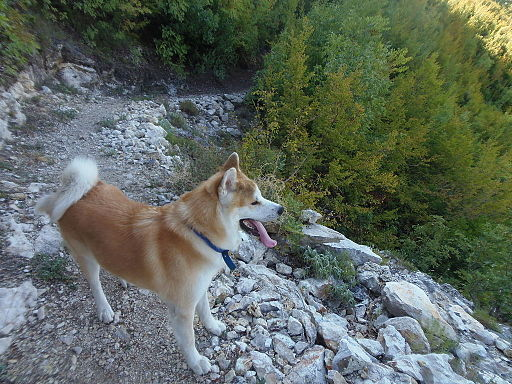

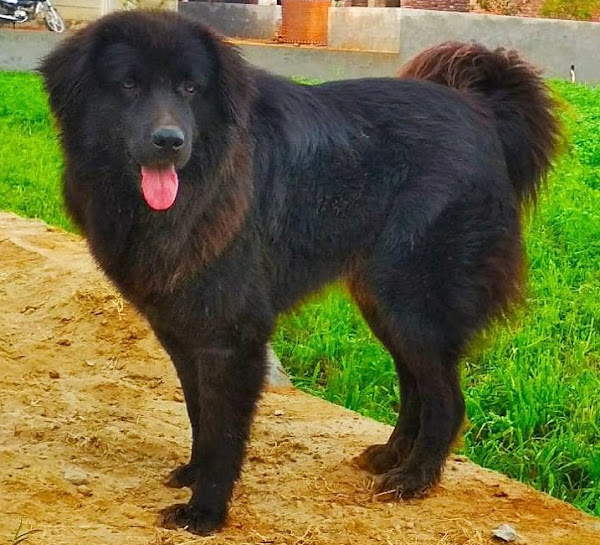

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


def get_all_breeds():
  url='https://dog.ceo/api/breeds/list/all'
  all_breeds=[]
  response=requests.get(url).json()['message']
  for breed,t in response.items():
    all_breeds.append(breed)
  print(all_breeds)


def type_breeds():
  global breeds
  breeds= input('Введите породы собак через запятую: ').split(', ')


def get_breeds_images():
  global breeds
  for breed in breeds:

    url = f"https://dog.ceo/api/breed/{breed}/images/random"
    response = requests.get(url)

    if response.status_code == 200:
          image_url = response.json()['message']

    res = requests.get(image_url)
    img = Image.open(io.BytesIO(res.content))
    display(img)


get_all_breeds()
type_breeds()
get_breeds_images()
